First we create our manual dataset on which we will perform k means algorithm:

In [0]:
from matplotlib import style
import matplotlib.pyplot as plt
style.use('ggplot')
import numpy as np
X = np.array([[1,7],
              [2,1],
              [7,8],
              [12,10],
              [2,2],
              [8,11],
              [4,1],
              [10,12],
              [1,4],
              [4,4],
              [8,8]])

Defining our own class:

In [0]:
class K_Means:
  def __init__(self,k=2,tol=0.001,max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self,data):

    self.centroids = {}

    #initially considering first k elements of data as centroids
    for i in range(self.k):
      self.centroids[i] = data[i]

    #beniginning of optimization process
    for i in range(self.max_iter):
      self.classifications = {} #It contains the centroids as key and features from as the value to which centroid it belongs to

      for i in range(self.k):
        self.classifications[i] = [] #initially creating emplty lists for the centroids as key

      #Now populating the above empty list
      for featureset in data:
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids] #It creates list with distance of every features with every centroids
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      #storing previous centroids so that we can compare change in new centroid to compare it to tolarence value
      prev_centroids = dict(self.centroids)

      #Defining new centroids
      for classification in self.classifications:
        self.centroids[classification] = np.average(self.classifications[classification],axis=0) #Taking the average of all the features of classification and then redefining the centroids

      optimized = True

      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]

        #now comparing centroids
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
          optimized = False

      #Now if optimized break the entire for loop else continue running it
      if optimized:
        break
      

  def predict(self,data):
    distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids] #It creates list with distance of every features with every centroids
    classification = distances.index(min(distances))
    return classification

Now training and visualizing our data with the centroids:

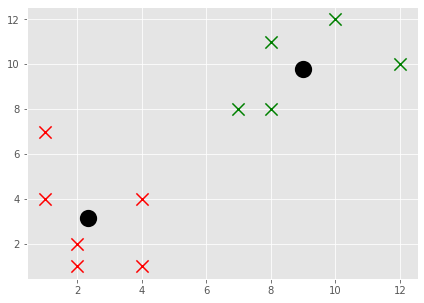

In [5]:
clf = K_Means()

colors = 10*["g","r","c","b","k"]

#Now train
clf.fit(X)
fig = plt.figure(figsize=(7,5))
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker="o",color="k",s=150,linewidths=5)

for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0],featureset[1],marker="x",color=color,s=150,linewidths=5)

plt.show()
fig.savefig('KMeans.jpg', bbox_inches='tight', dpi=150)

## **Applying the algorithm on sklearn's breast cancer dataset**

In [0]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing

#Loading the data and forming the dataframe
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [7]:
print(df)

     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]


In [0]:
#defining the features and the labels
X = np.array(df.drop(['target'],1))
y = np.array(df['target'])

In [10]:
clf = K_Means(k=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
  predict = np.array(X[i].astype(float))
  predict = predict.reshape(-1,len(predict))
  prediction = clf.predict(predict)
  
  if prediction == y[i]:
    correct += 1


print('Accuracy:',correct/len(X))

Accuracy: 0.7697715289982425
